<a href="https://colab.research.google.com/github/olavo-melo-py/app1/blob/main/Olavo_Grupo_1_01_Aluno_EDA_Classifica%C3%A7%C3%A3o_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Grupo 1

- Clausio Barbosa - cttb@cesar.school
- Enio Kilder  - ekos@cesar.school
- Filipe Amado - fav@cesar.school
- Olavo - omrm@cesar.school
- Thiago Tenório - tbat@cesar.school
- Flávius Sodré - Fras@cesar.school






##**Titanic - Apresentação dos Dados**

**Data Dictionary**

| Variable | Definition                                 | Key                                            | Notes                                                                                                                                       |
|----------|--------------------------------------------|------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------|
| survival | Survival                                   | 0 = No, 1 = Yes                                |                                                                                                                                             |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      | A proxy for socio-economic status (SES) 1st = Upper 2nd = Middle 3rd = Lower                                                                |
| sex      | Sex                                        |                                                |                                                                                                                                             |
| Age      | Age in years                               |                                                | Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5                                                        |
| sibsp    | # of siblings / spouses aboard the Titanic |                                                | Sibling = brother, sister, stepbrother, stepsister  Spouse = husband, wife (mistresses and fiancés were ignored)                            |
| parch    | # of parents / children aboard the Titanic |                                                | Parent = mother, father Child = daughter, son, stepdaughter, stepson Some children travelled only with a nanny, therefore parch=0 for them. |
| ticket   | Ticket number                              |                                                |                                                                                                                                             |
| fare     | Passenger fare                             |                                                |                                                                                                                                             |
| cabin    | Cabin number                               |                                                |                                                                                                                                             |
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |                                                                                                                                             |

# Análise Exploratória de Dados (EDA)

O objetivo deste estudo é aplicar transformações, normalizações e análises descritivas e estatísticas dos dados. Por fim, é preciso que seja feita uma conclusão do estudo realizado.

Base de dados utilizada: Titanic
1. Carregamento de dados
2. Análise dos dados
3. Transformação dos dados (categoricos/binarização)
2. Remoção de campos desnecessários (nome, id, ticket, cabine)
4. Tratamento de dados nulos e/ou faltantes
5. Separação dos dados, holdout
6. Normalização dos dados

## Importar bibliotecas
** Importe pandas, seaborn e as bibliotecas usuais. **

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Analise de dados ausentes
import missingno as msno

## Obtenha os dados
** Leia o arquivo csv 'titanic.csv' em um DataFrame **

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv')

** Verifique o cabeçalho do DataFrame.**

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Transformação dos dados (categoricos/binarização)

## Categorização

In [6]:
from sklearn import preprocessing

In [7]:
le = preprocessing.LabelEncoder()

In [8]:
le.fit(df['Sex'])

LabelEncoder()

In [9]:
df['Sex_le'] = le.transform(df['Sex'])

In [10]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_le
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [11]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

## Binarização

In [12]:
df_embarked = pd.get_dummies(df, columns = ['Embarked'])

In [13]:
df_embarked

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_le,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,1,1,0,0


In [14]:
df_embarked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Sex_le       891 non-null    int64  
 12  Embarked_C   891 non-null    uint8  
 13  Embarked_Q   891 non-null    uint8  
 14  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(6), object(4), uint8(3)
memory usage: 86.3+ KB


# Remoção de campos desnecessários (PassengerId, Name, Ticket, Cabin)

In [15]:
df_embarked.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

In [16]:
df_embarked

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Sex_le,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,1,0,0,1
887,1,1,female,19.0,0,0,30.0000,0,0,0,1
888,0,3,female,NaN,1,2,23.4500,0,0,0,1
889,1,1,male,26.0,0,0,30.0000,1,1,0,0


# Tratamento de dados nulos e/ou faltantes

Describe

In [17]:
df_embarked.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_le,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.188552,0.086420,0.722783
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,0.391372,0.281141,0.447876
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


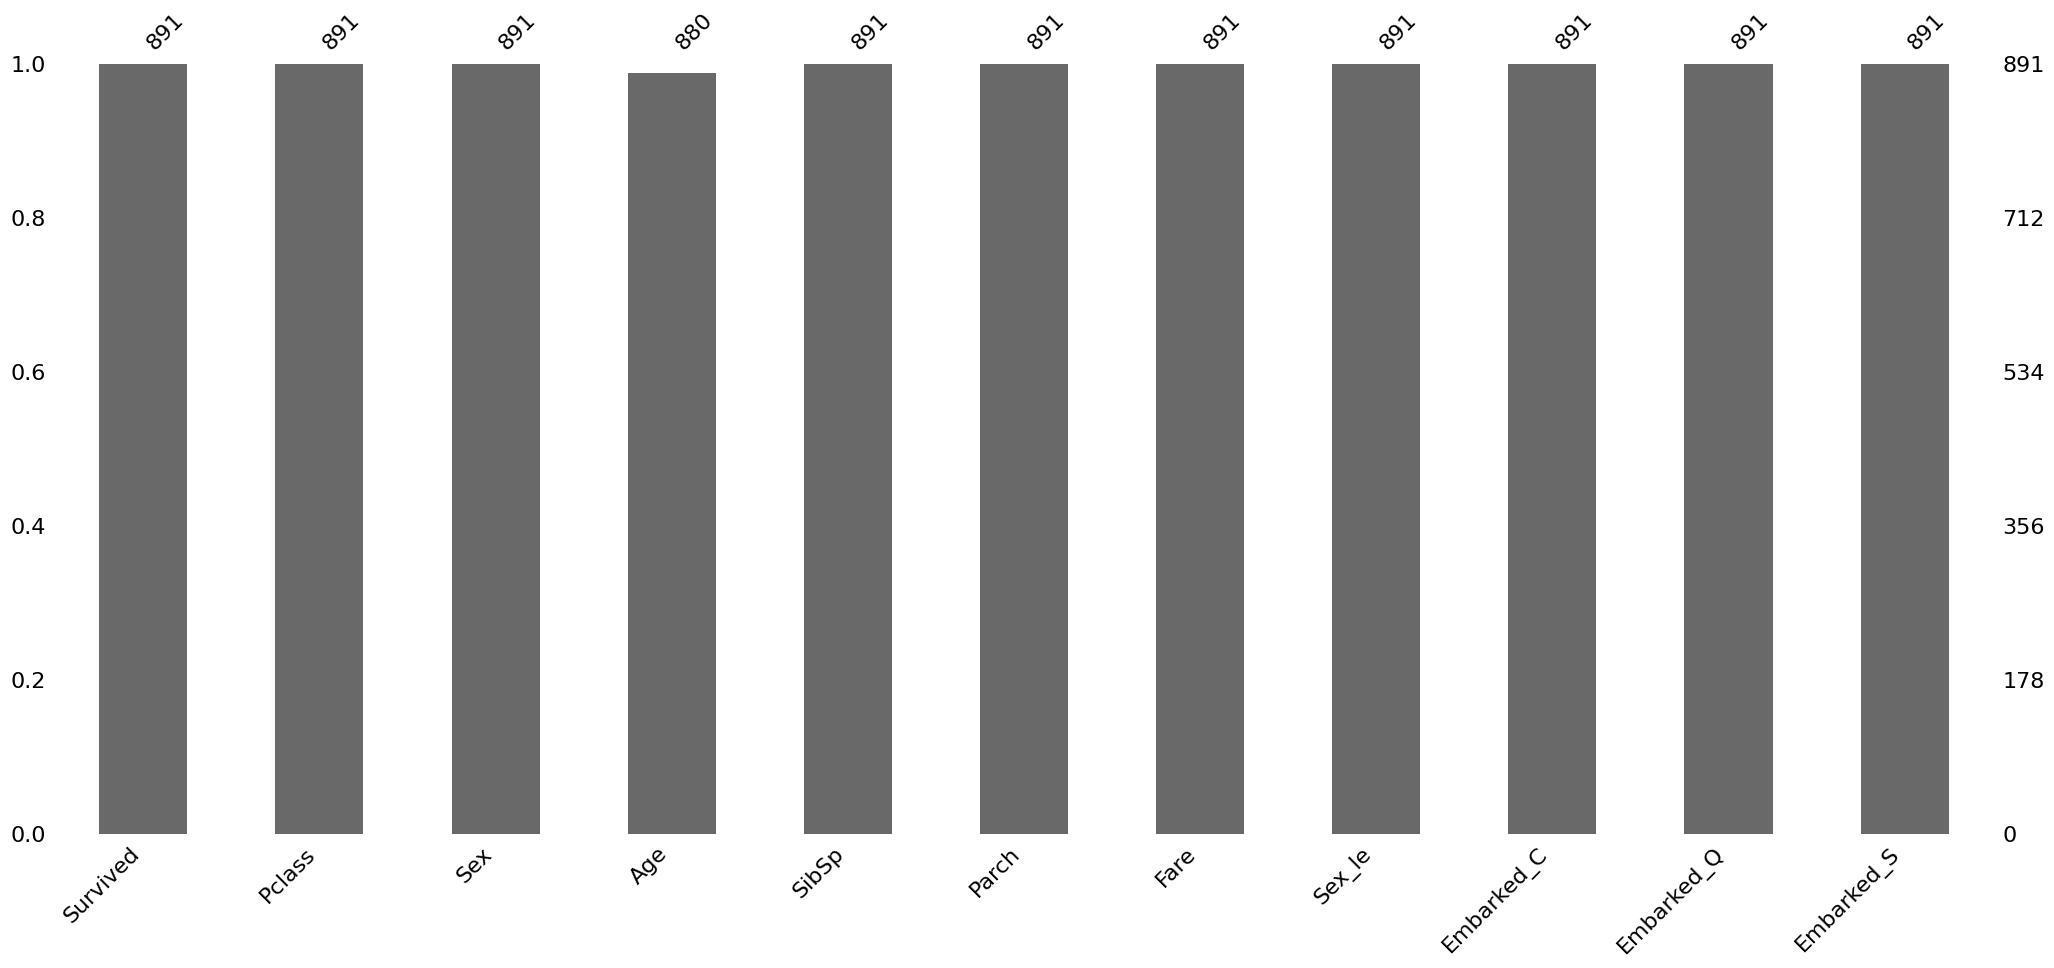

In [21]:
ax = msno.bar(df_embarked)

Male

In [19]:
df_embarked.loc[df_embarked.Age.isna() & (df_embarked.Pclass == 1) & (df_embarked.Sex == 'male'), 'Age'] = df_embarked[df_embarked.Pclass == 1 & (df_embarked.Sex == 'male')].Age.median()
df_embarked.loc[df_embarked.Age.isna() & (df_embarked.Pclass == 2) & (df_embarked.Sex == 'male'), 'Age'] = df_embarked[df_embarked.Pclass == 2 & (df_embarked.Sex == 'male')].Age.median()
df_embarked.loc[df_embarked.Age.isna() & (df_embarked.Pclass == 3) & (df_embarked.Sex == 'male'), 'Age'] = df_embarked[df_embarked.Pclass == 3 & (df_embarked.Sex == 'male')].Age.median()

Female

In [20]:
df_embarked.loc[df_embarked.Age.isna() & (df_embarked.Pclass == 1) & (df_embarked.Sex == 'female'), 'Age'] = df_embarked[df_embarked.Pclass == 1 & (df_embarked.Sex == 'female')].Age.median()
df_embarked.loc[df_embarked.Age.isna() & (df_embarked.Pclass == 2) & (df_embarked.Sex == 'female'), 'Age'] = df_embarked[df_embarked.Pclass == 2 & (df_embarked.Sex == 'female')].Age.median()
df_embarked.loc[df_embarked.Age.isna() & (df_embarked.Pclass == 3) & (df_embarked.Sex == 'female'), 'Age'] = df_embarked[df_embarked.Pclass == 3 & (df_embarked.Sex == 'female')].Age.median()

Removendo os dados nulos remanencentes

In [22]:
df_embarked.isnull().mean() * 100

Survived      0.000000
Pclass        0.000000
Sex           0.000000
Age           1.234568
SibSp         0.000000
Parch         0.000000
Fare          0.000000
Sex_le        0.000000
Embarked_C    0.000000
Embarked_Q    0.000000
Embarked_S    0.000000
dtype: float64

In [23]:
df_embarked.dropna(inplace = True)

In [24]:
df_embarked.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 880 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    880 non-null    int64  
 1   Pclass      880 non-null    int64  
 2   Sex         880 non-null    object 
 3   Age         880 non-null    float64
 4   SibSp       880 non-null    int64  
 5   Parch       880 non-null    int64  
 6   Fare        880 non-null    float64
 7   Sex_le      880 non-null    int64  
 8   Embarked_C  880 non-null    uint8  
 9   Embarked_Q  880 non-null    uint8  
 10  Embarked_S  880 non-null    uint8  
dtypes: float64(2), int64(5), object(1), uint8(3)
memory usage: 64.5+ KB


# Separação dos dados, holdout

Use o método train_test_split para dividir seus dados em um conjunto treino e teste.

Removendo a coluna Sex pois não será utilizada para treinar o modelo

In [25]:
df_embarked.drop(columns=['Sex'], inplace=True)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df_embarked.drop(columns=['Survived']),
                                                    df_embarked['Survived'],
                                                    test_size=0.3,
                                                    random_state=111)

In [28]:
pd.DataFrame(X_train)

,Pclass,Age,SibSp,Parch,Fare,Sex_le,Embarked_C,Embarked_Q,Embarked_S
689,1,15.0,0,1,211.3375,0,0,0,1
135,2,23.0,0,0,15.0458,1,1,0,0
97,1,23.0,0,1,63.3583,1,1,0,0
25,3,38.0,1,5,31.3875,0,0,0,1
424,3,18.0,1,1,20.2125,1,0,0,1
...,...,...,...,...,...,...,...,...,...
278,3,7.0,4,1,29.1250,1,0,1,0
87,3,40.0,0,0,8.0500,1,0,0,1
735,3,28.5,0,0,16.1000,1,0,0,1
887,1,19.0,0,0,30.0000,0,0,0,1


# Normalização dos dados

Hora de para padronizar as variáveis.

Import StandardScaler do Scikit-learn.

Converta as variáveis independentes com o StandardScaler

In [29]:
cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

sca = preprocessing.StandardScaler()

Use o método .transform () para transformar os parâmetros em uma versão padronizada.

In [30]:
sca.fit(X_train[cols])
X_train[[c +'_scaled' for c in cols]] = sca.transform(X_train[cols])
X_test[[c +'_scaled' for c in cols]] = sca.transform(X_test[cols])

In [31]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_le,Embarked_C,Embarked_Q,Embarked_S,Pclass_scaled,Age_scaled,SibSp_scaled,Parch_scaled,Fare_scaled
689,1,15.0,0,1,211.3375,0,0,0,1,-1.569823,-1.206317,-0.478322,0.810956,3.585812
135,2,23.0,0,0,15.0458,1,1,0,0,-0.377454,-0.615140,-0.478322,-0.476541,-0.349461
97,1,23.0,0,1,63.3583,1,1,0,0,-1.569823,-0.615140,-0.478322,0.810956,0.619112
25,3,38.0,1,5,31.3875,0,0,0,1,0.814914,0.493317,0.436729,5.960947,-0.021841
424,3,18.0,1,1,20.2125,1,0,0,1,0.814914,-0.984625,0.436729,0.810956,-0.245879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,3,7.0,4,1,29.1250,1,0,1,0,0.814914,-1.797494,3.181882,0.810956,-0.067200
87,3,40.0,0,0,8.0500,1,0,0,1,0.814914,0.641112,-0.478322,-0.476541,-0.489714
735,3,28.5,0,0,16.1000,1,0,0,1,0.814914,-0.208705,-0.478322,-0.476541,-0.328327
887,1,19.0,0,0,30.0000,0,0,0,1,-1.569823,-0.910728,-0.478322,-0.476541,-0.049658


In [32]:
X_test

,Pclass,Age,SibSp,Parch,Fare,Sex_le,Embarked_C,Embarked_Q,Embarked_S,Pclass_scaled,Age_scaled,SibSp_scaled,Parch_scaled,Fare_scaled
506,2,33.0,0,2,26.0000,0,0,0,1,-0.377454,0.123832,-0.478322,2.098454,-0.129851
792,3,35.0,8,2,69.5500,0,0,0,1,0.814914,0.271626,6.842087,2.098454,0.743244
384,3,40.0,0,0,7.8958,1,0,0,1,0.814914,0.641112,-0.478322,-0.476541,-0.492805
509,3,26.0,0,0,56.4958,1,0,0,1,0.814914,-0.393448,-0.478322,-0.476541,0.481532
805,3,31.0,0,0,7.7750,1,0,0,1,0.814914,-0.023963,-0.478322,-0.476541,-0.495227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,1,40.0,0,0,39.6000,1,1,0,0,-1.569823,0.641112,-0.478322,-0.476541,0.142803
358,3,35.0,0,0,7.8792,0,0,1,0,0.814914,0.271626,-0.478322,-0.476541,-0.493138
230,1,35.0,1,0,83.4750,0,0,0,1,-1.569823,0.271626,0.436729,-0.476541,1.022413
197,3,42.0,0,1,8.4042,1,0,0,1,0.814914,0.788906,-0.478322,0.810956,-0.482613


Usando o Scale

Converta os parâmetros padronizados em um DataFrame e verifique o cabeçalho desse DataFrame para garantir que a transform() funcionou.

In [33]:
X_train_fare = pd.DataFrame(X_train.sort_index(), columns=['Fare'])
X_train_fare_scaled = sca.fit_transform(X_train_fare)

In [34]:
X_train_fare_scaled[:10]

array([[-0.50575219],
       [-0.49221973],
       [ 0.41345265],
       [-0.48971372],
       [ 0.38864314],
       [-0.22858737],
       [-0.42789945],
       [-0.04823878],
       [-0.31629776],
       [-0.49363914]])

In [35]:
X_train['Fare'].sort_index().head(10)

0      7.2500
2      7.9250
3     53.1000
4      8.0500
6     51.8625
7     21.0750
8     11.1333
9     30.0708
10    16.7000
14     7.8542
Name: Fare, dtype: float64

In [36]:
sca.inverse_transform(X_train_fare_scaled)[:10]

array([[ 7.25  ],
       [ 7.925 ],
       [53.1   ],
       [ 8.05  ],
       [51.8625],
       [21.075 ],
       [11.1333],
       [30.0708],
       [16.7   ],
       [ 7.8542]])



---


**Apliação do método de classificação - KNN**

---



In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
neigh = KNeighborsClassifier(n_neighbors=1)

In [39]:
neigh.fit(X_train_scaled, y_train)

NameError: ignored